In [393]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string

In [394]:
# Load the dataset as a pandas DataFrame
chr_analytic_csv_path = Path.cwd().parent / "data" / "chr_analytic_data2022.csv"
chr_analytic_df = pd.read_csv(chr_analytic_csv_path, skiprows=1)
chr_analytic_df

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
0,0,0,0,US,United States,2022,NaN,7281.935564,4125218.0,917267406.0,...,0.507545,167227921,329484123,NaN,NaN,0.192690,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2022,NaN,10350.071456,88086.0,13668498.0,...,0.517027,2544566,4921532,NaN,NaN,0.409632,1957932.0,4779736.0,NaN,NaN
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,836.0,156081.0,...,0.515077,28919,56145,NaN,NaN,0.420022,22921.0,54571.0,NaN,NaN
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,3377.0,614143.0,...,0.515891,118287,229287,NaN,NaN,0.422791,77060.0,182265.0,NaN,NaN
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,539.0,68126.0,...,0.471837,11602,24589,NaN,NaN,0.677896,18613.0,27457.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,599.0,122399.0,...,0.483608,20637,42673,NaN,NaN,0.109163,4782.0,43806.0,NaN,NaN
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,111.0,66036.0,...,0.481338,11310,23497,NaN,NaN,0.464309,9887.0,21294.0,NaN,NaN
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,287.0,57690.0,...,0.493940,9985,20215,NaN,NaN,0.430959,9101.0,21118.0,NaN,NaN
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,115.0,21075.0,...,0.490464,3806,7760,NaN,NaN,0.359545,3068.0,8533.0,NaN,NaN


In [395]:
# Remove columns with more than 50% nan
chr_analytic_df.dropna(axis = 1, thresh = int(0.6 * len(chr_analytic_df)), inplace=True)
chr_analytic_df

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v059_numerator,v059_denominator,v059_cilow,v059_cihigh,v057_rawvalue,v057_numerator,v057_denominator,v058_rawvalue,v058_numerator,v058_denominator
0,0,0,0,US,United States,2022,NaN,7281.935564,4125218.0,917267406.0,...,12766829,306919116,0.041357,0.041836,0.507545,167227921,329484123,0.192690,NaN,NaN
1,1,0,1000,AL,Alabama,2022,NaN,10350.071456,88086.0,13668498.0,...,46887,4599254,0.009667,0.010722,0.517027,2544566,4921532,0.409632,1957932.0,4779736.0
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,836.0,156081.0,...,363,52404,0.001701,0.012153,0.515077,28919,56145,0.420022,22921.0,54571.0
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,3377.0,614143.0,...,1593,206329,0.004913,0.010529,0.515891,118287,229287,0.422791,77060.0,182265.0
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,539.0,68126.0,...,433,23694,0.007950,0.028599,0.471837,11602,24589,0.677896,18613.0,27457.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,599.0,122399.0,...,321,40482,0.002901,0.012958,0.483608,20637,42673,0.109163,4782.0,43806.0
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,111.0,66036.0,...,668,22310,0.014451,0.045433,0.481338,11310,23497,0.464309,9887.0,21294.0
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,287.0,57690.0,...,237,18910,0.001921,0.023145,0.493940,9985,20215,0.430959,9101.0,21118.0
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,115.0,21075.0,...,16,7491,0.000000,0.012753,0.490464,3806,7760,0.359545,3068.0,8533.0


In [396]:
# Get dataframe without categorical data
numeric_chr_analytic_df = chr_analytic_df.drop(["state", "county"], axis=1)
numeric_chr_analytic_df.dropna(axis='columns', inplace=True)
numeric_chr_analytic_df.drop(["statecode", "countycode", "fipscode", "v001_flag"], axis = 1, inplace=True)

numeric_chr_analytic_df.interpolate(inplace=True)
# Replace remaining NaN with median of column
#imputer = SimpleImputer(missing_values=np.nan, strategy="median")
#imputer = imputer.fit(numeric_chr_analytic_df)
#numeric_chr_analytic_df = imputer.transform(numeric_chr_analytic_df)

numeric_chr_analytic_df

,year,v002_rawvalue,v036_rawvalue,v042_rawvalue,v037_flag,v009_rawvalue,v011_rawvalue,v133_denominator,v070_rawvalue,v049_rawvalue,...,v056_denominator,v126_rawvalue,v126_numerator,v126_denominator,v059_rawvalue,v059_numerator,v059_denominator,v057_rawvalue,v057_numerator,v057_denominator
0,2022,0.171052,3.907359,4.526981,0,0.164926,0.321,0.109,0.259,0.197875,...,329484123,0.597217,196773390,329484123,0.041597,12766829,306919116,0.507545,167227921,329484123
1,2022,0.214102,4.814633,5.618316,0,0.210927,0.363,0.161,0.308,0.147992,...,4921532,0.651378,3205777,4921532,0.010194,46887,4599254,0.517027,2544566,4921532
2,2022,0.201000,4.510042,5.419068,0,0.197000,0.353,0.157,0.322,0.161612,...,56145,0.731659,41079,56145,0.006927,363,52404,0.515077,28919,56145
3,2022,0.172000,4.168866,5.173915,0,0.199000,0.296,0.134,0.276,0.215035,...,229287,0.833083,191015,229287,0.007721,1593,206329,0.515891,118287,229287
4,2022,0.311000,5.884415,6.109899,0,0.278000,0.404,0.207,0.416,0.139276,...,24589,0.452641,11130,24589,0.018275,433,23694,0.471837,11602,24589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2022,0.163000,3.495993,3.933550,0,0.170000,0.335,0.113,0.252,0.176325,...,42673,0.791953,33795,42673,0.007929,321,40482,0.483608,20637,42673
3190,2022,0.116000,2.779692,3.305173,0,0.113000,0.222,0.090,0.185,0.193689,...,23497,0.810146,19036,23497,0.029942,668,22310,0.481338,11310,23497
3191,2022,0.172000,3.792121,4.268578,0,0.188000,0.298,0.126,0.278,0.181873,...,20215,0.868068,17548,20215,0.012533,237,18910,0.493940,9985,20215
3192,2022,0.173000,3.660729,4.040619,0,0.176000,0.289,0.116,0.259,0.190701,...,7760,0.824742,6400,7760,0.002136,16,7491,0.490464,3806,7760


In [397]:
# Generate a mapping that converts variable names to their descriptions
VAR_DESCRIPTION_MAPPING = dict((k, v) for (v, k) in pd.read_csv(chr_analytic_csv_path, nrows=1).iloc[0].items())


In [398]:
# Find correlation between columns
corr = chr_analytic_df.corr(method="pearson", numeric_only=True)
corr

,statecode,countycode,fipscode,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,v001_cilow,v001_cihigh,...,v059_numerator,v059_denominator,v059_cilow,v059_cihigh,v057_rawvalue,v057_numerator,v057_denominator,v058_rawvalue,v058_numerator,v058_denominator
statecode,1.000000,0.164398,0.999976,NaN,-0.006941,-0.061610,-0.040196,-0.040763,-0.068275,-0.043465,...,-0.046103,-0.040613,-0.001455,0.042923,-0.007980,-0.040517,-0.040507,0.013596,0.001459,-0.029821
countycode,0.164398,1.000000,0.171292,NaN,-0.012517,0.086991,-0.035069,-0.035367,0.062290,0.095500,...,-0.034418,-0.035233,0.082418,0.153367,0.026943,-0.035179,-0.035176,-0.071063,-0.107668,-0.089761
fipscode,0.999976,0.171292,1.000000,NaN,-0.007022,-0.060922,-0.040397,-0.040965,-0.067754,-0.042738,...,-0.046292,-0.040814,-0.000862,0.043971,-0.007779,-0.040718,-0.040708,0.013074,0.000691,-0.030423
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_ranked,-0.006941,-0.012517,-0.007022,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.018471,0.043316,0.042070,-0.311772,0.101481,0.043405,0.043472,-0.182232,0.148991,0.043083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v057_numerator,-0.040517,-0.035179,-0.040718,NaN,0.043405,-0.028170,0.999318,0.999989,-0.004594,-0.043368,...,0.982911,0.999994,0.067330,0.021601,0.020038,1.000000,0.999998,-0.064358,0.797529,0.998371
v057_denominator,-0.040507,-0.035176,-0.040708,NaN,0.043472,-0.028253,0.999273,0.999995,-0.004709,-0.043416,...,0.983073,0.999994,0.067306,0.021613,0.019752,0.999998,1.000000,-0.064271,0.795690,0.998257
v058_rawvalue,0.013596,-0.071063,0.013074,NaN,-0.182232,0.239665,-0.061064,-0.064156,-0.006537,0.433985,...,-0.070986,-0.064225,-0.395445,-0.089674,-0.200306,-0.064358,-0.064271,1.000000,-0.125524,-0.202429
v058_numerator,0.001459,-0.107668,0.000691,NaN,0.148991,-0.043915,0.862065,0.793651,0.027595,-0.096699,...,0.502188,0.794422,0.086699,-0.009366,0.057899,0.797529,0.795690,-0.125524,1.000000,0.796579


<AxesSubplot: >

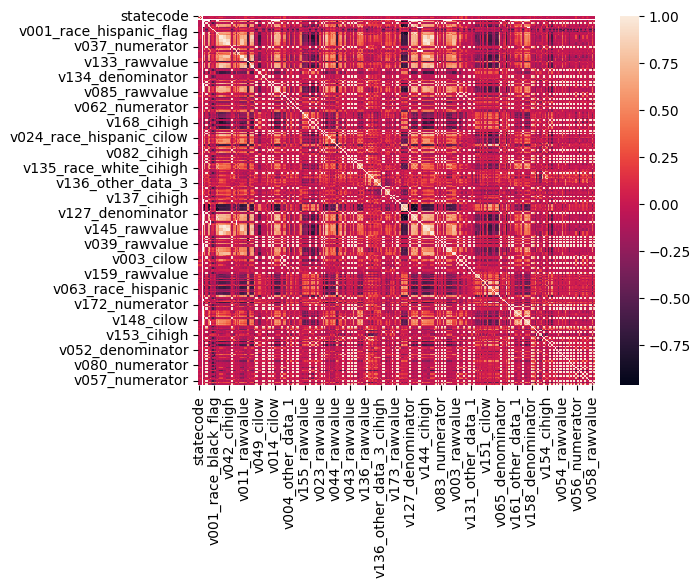

In [399]:
sns.heatmap(corr)


10 variables most correlated with Preventable hospital stays raw value
v070_cilow           Physical inactivity CI low                         0.5260275710303774


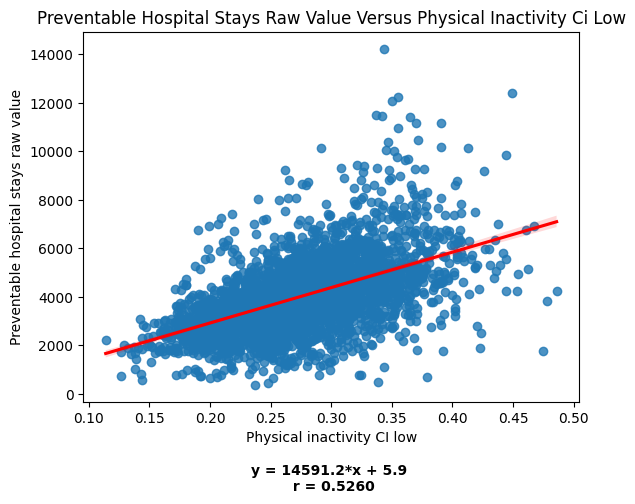

v070_rawvalue        Physical inactivity raw value                      0.525931242207064


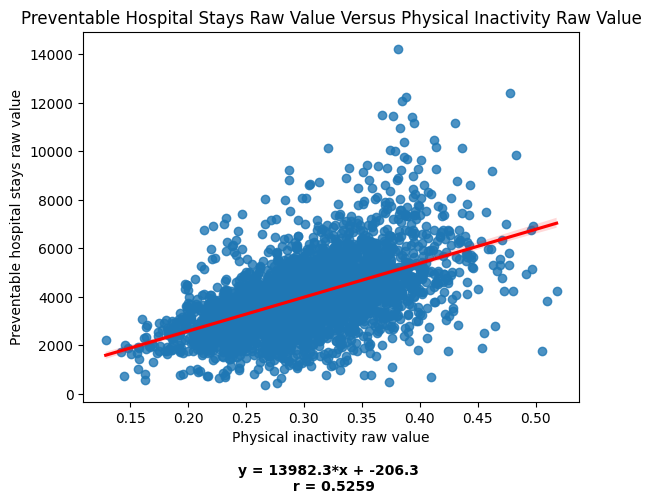

v070_cihigh          Physical inactivity CI high                        0.5235455489204062


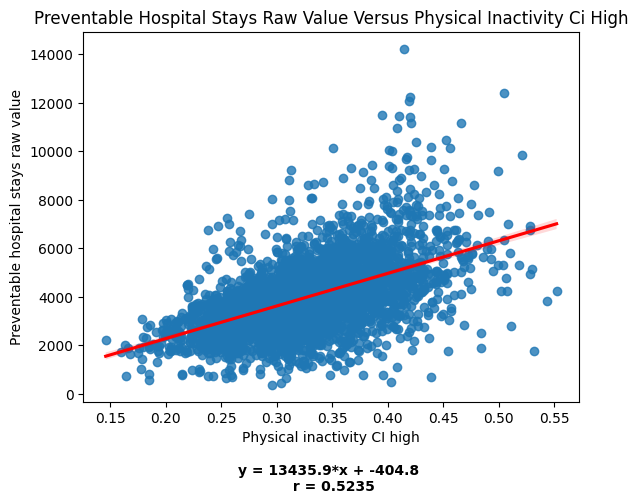

v127_cilow           Premature age-adjusted mortality CI low            0.5171553470397664


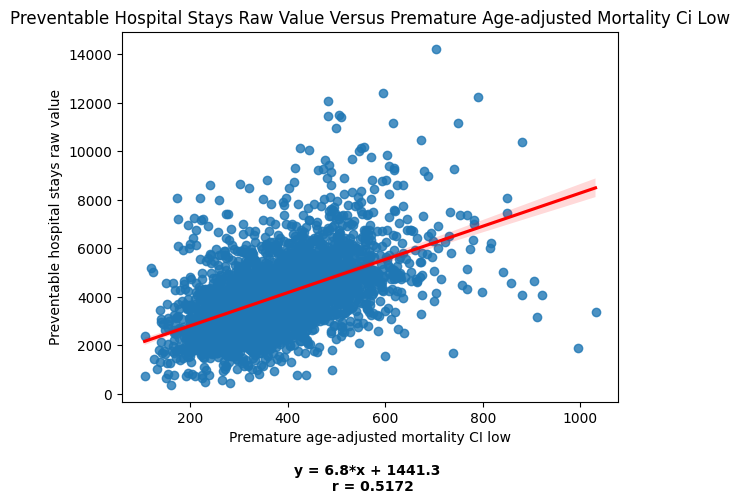

v147_rawvalue        Life expectancy raw value                          -0.5112719151620665


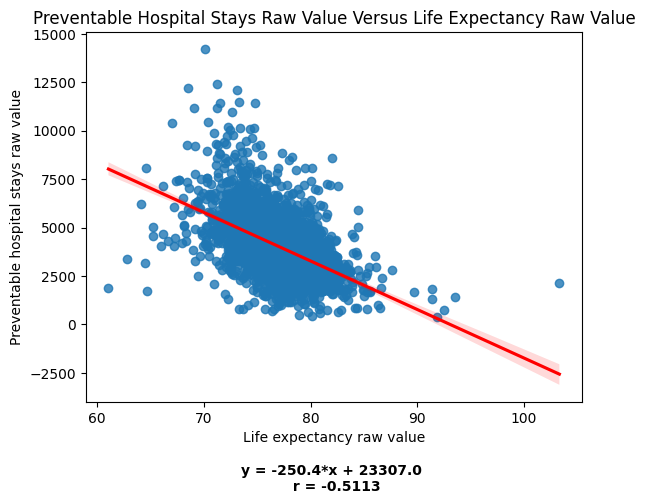

v127_rawvalue        Premature age-adjusted mortality raw value         0.5078013047150999


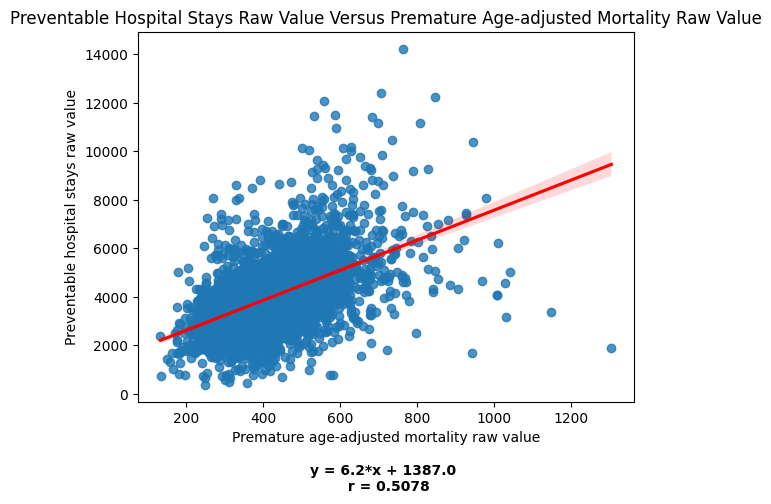

v127_race_white      Premature age-adjusted mortality (White)           0.5056262920781645


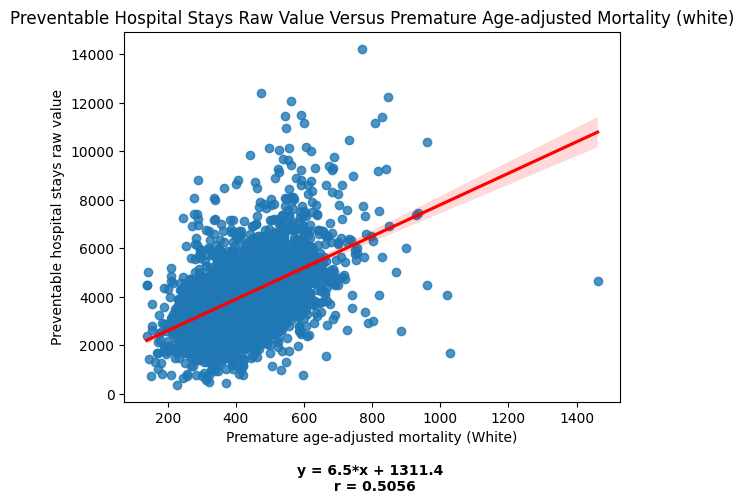

v143_cilow           Insufficient sleep CI low                          0.503627595373518


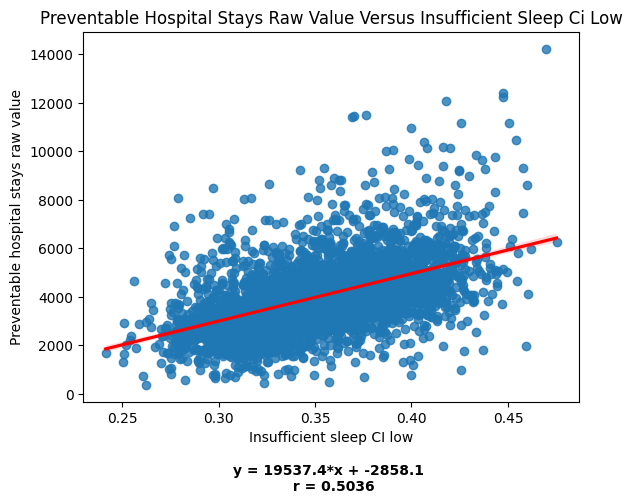

v143_rawvalue        Insufficient sleep raw value                       0.5030748099476409


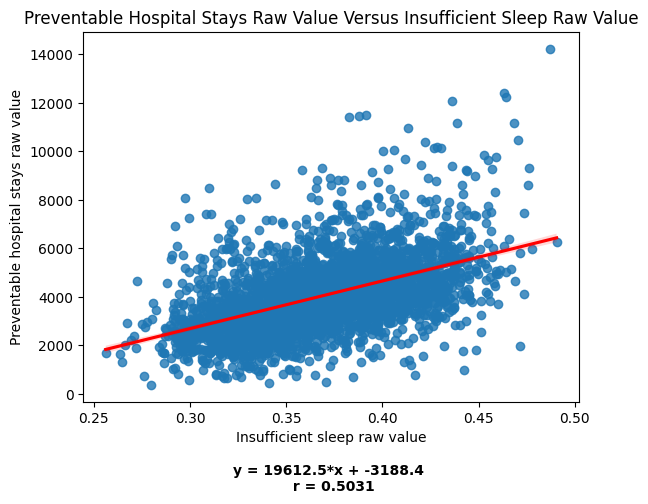

v002_rawvalue        Poor or fair health raw value                      0.5027763246576143


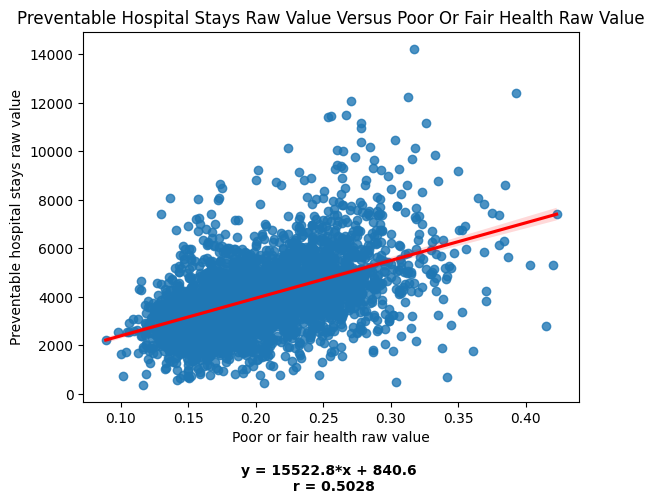

<Figure size 640x480 with 0 Axes>

In [400]:
# Create a series containing absolute value of correlations of rows to v005_rawvalue (Preventable hospital stays raw value)
absolute_correlations = abs(corr["v005_rawvalue"])

# Remove rows with labels that contain v005, as these are also preventable hospital stays
for label, value in absolute_correlations.items():
    if "v005" in label:
        absolute_correlations.drop(label, inplace = True)

# Get the ten rows with the most correlation
N_most_correlated = 10
most_correlated = absolute_correlations.nlargest(N_most_correlated)
print(f"{N_most_correlated} variables most correlated with {VAR_DESCRIPTION_MAPPING['v005_rawvalue']}")
for label, value in most_correlated.items():
    print(label.ljust(20), VAR_DESCRIPTION_MAPPING[label].ljust(50), corr.loc["v005_rawvalue", label])
    scatter_plot = sns.regplot(x=chr_analytic_df[label], y=chr_analytic_df["v005_rawvalue"], line_kws = {"color":"red"})
    scatter_plot.set_xlabel(VAR_DESCRIPTION_MAPPING[label])
    scatter_plot.set_ylabel(VAR_DESCRIPTION_MAPPING["v005_rawvalue"])
    scatter_plot.set_title(string.capwords(f"{VAR_DESCRIPTION_MAPPING['v005_rawvalue']} versus {VAR_DESCRIPTION_MAPPING[label]}"))


    df = chr_analytic_df[ [label, "v005_rawvalue"] ].copy()
    df = df.dropna()
    a, b = np.polyfit(df[label], df["v005_rawvalue"], 1)

    #g = sns.lmplot(label,'v005_rawvalue', chr_analytic_df,fit_reg=True,aspect=1.5,ci=None, scatter_kws={"s": 100})
    #props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
    plt.text(0.5, -0.25, f"y = {a:.1f}*x + {b:.1f} \n r = {corr.loc['v005_rawvalue', label]:.4f}", verticalalignment="bottom", horizontalalignment='center', transform=scatter_plot.transAxes, size='medium', color='black', weight='semibold')

    #plt.text(0.0, 0.0, f"y = {a}*x + {b}", transform=scatter_plot.ax.transAxes, fontsize=14, bbox=props)
    plt.show()
    plt.figure()